In [3]:
import csv
import os
import time
from daqhats import mcc128, OptionFlags, HatIDs, HatError, AnalogInputMode, AnalogInputRange
from daqhats_utils import select_hat_device, chan_list_to_mask
import argparse
import h5py
import numpy as np
import subprocess

In [2]:
address = select_hat_device(HatIDs.MCC_128)
hat = mcc128(address)
input_range = AnalogInputRange.BIP_10V
hat.calibration_coefficient_read(a_in_range=input_range)

MCC128CalInfo(slope=1.0083421207668117, offset=-295.30861087311496)

In [38]:
def read_voltage(channel="EXT5V_V"):
    try:
        output = subprocess.check_output(['vcgencmd', 'pmic_read_adc', channel], encoding='utf-8')
        voltage_str = output.split('=')[1].replace('V', '').strip()
        value = float(voltage_str)
        return value
    except Exception as e:
        return None
        
def get_cpu_temperature():
    try:
        output = subprocess.check_output(['vcgencmd', 'measure_temp'], encoding='utf-8')
        temp_str = output.strip().split('=')[1].replace("'C", "")
        return float(temp_str)
    except Exception:
        return None

In [42]:
print(read_voltage())
print(get_cpu_temperature())

5.09602
46.1


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from magnetofft import *

In [15]:
filename = 'acquisitions/20250709_boxed/integer_data_test/mag_2025_07_09_17_00.hdf5'
dset = load_hdf5(filename)

No calibration, assuming data is calibrated.


In [12]:
dset['z']

array([20.74049492, 20.74479872, 20.74049492, ..., 20.71467213,
       20.71897593, 20.72112783], shape=(9951,))

In [16]:
filename = 'acquisitions/20250709_boxed/integer_data_test/mag_2025_07_10_17_32.hdf5'
dset = load_hdf5(filename)

In [23]:
dset['y']/1000. * 143.

array([10.07641366, 10.07641366, 10.07641366, ..., 10.07641366,
       10.07641366, 10.07641366], shape=(19997945,))

plot sample acquisitions/20250709_boxed/integer_data_test/mag_2025_07_10_17_32.hdf5:
plot complete acquisitions/20250709_boxed/integer_data_test/mag_2025_07_10_17_32.hdf5.


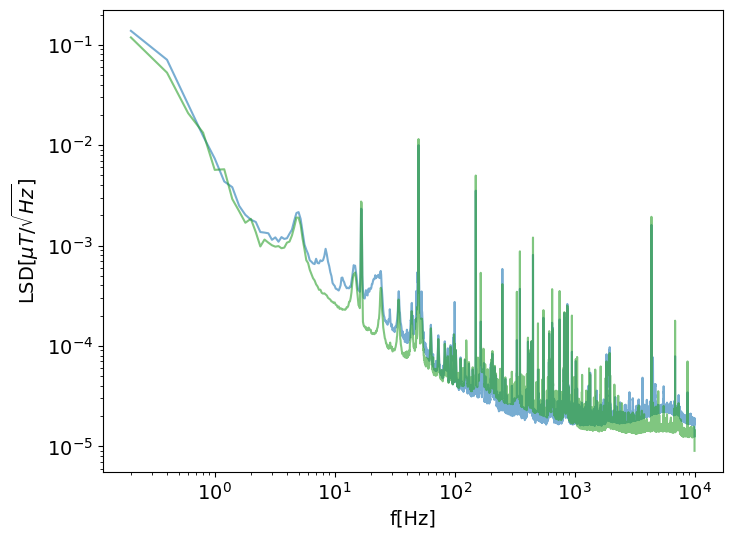

In [14]:
filename = 'acquisitions/20250709_boxed/integer_data_test/mag_2025_07_10_17_32.hdf5'
fs = 20000.0
fig,ax = plot_sample_psd(filename,fs=fs,orientation=['x','y','z'],label = '20khz 1000 s',Lbin=100000)

In [75]:
pathh5='acquisitions/20250709_boxed/integer_data_test/mag_2025_07_10_17_32.hdf5'
f = h5py.File(pathh5,'r')
data = f['voltage']
print(data[:2])
f.close()

[[21931 48939 65535]
 [21934 48941 65535]]


In [5]:
import numpy as np
import h5py

with h5py.File("acquisitions/20250710_boxed/12h_stresstest/mag_2025_07_10_18_32.hdf5", "r") as f:
    dset = f["voltage"]
    print(dset.iter_chunks())
    for sel in dset.iter_chunks():
        data = np.array(dset[sel]).astype(np.float32)
        print(np.shape(data))
        break

(8192, 3)


In [5]:
import polars as pl
pathcsv = 'acquisitions/20250715_longhaul/logs/monitorpi_2025_07_15_15_06.csv'
df = pl.read_csv(pathcsv)
data = df.to_numpy()

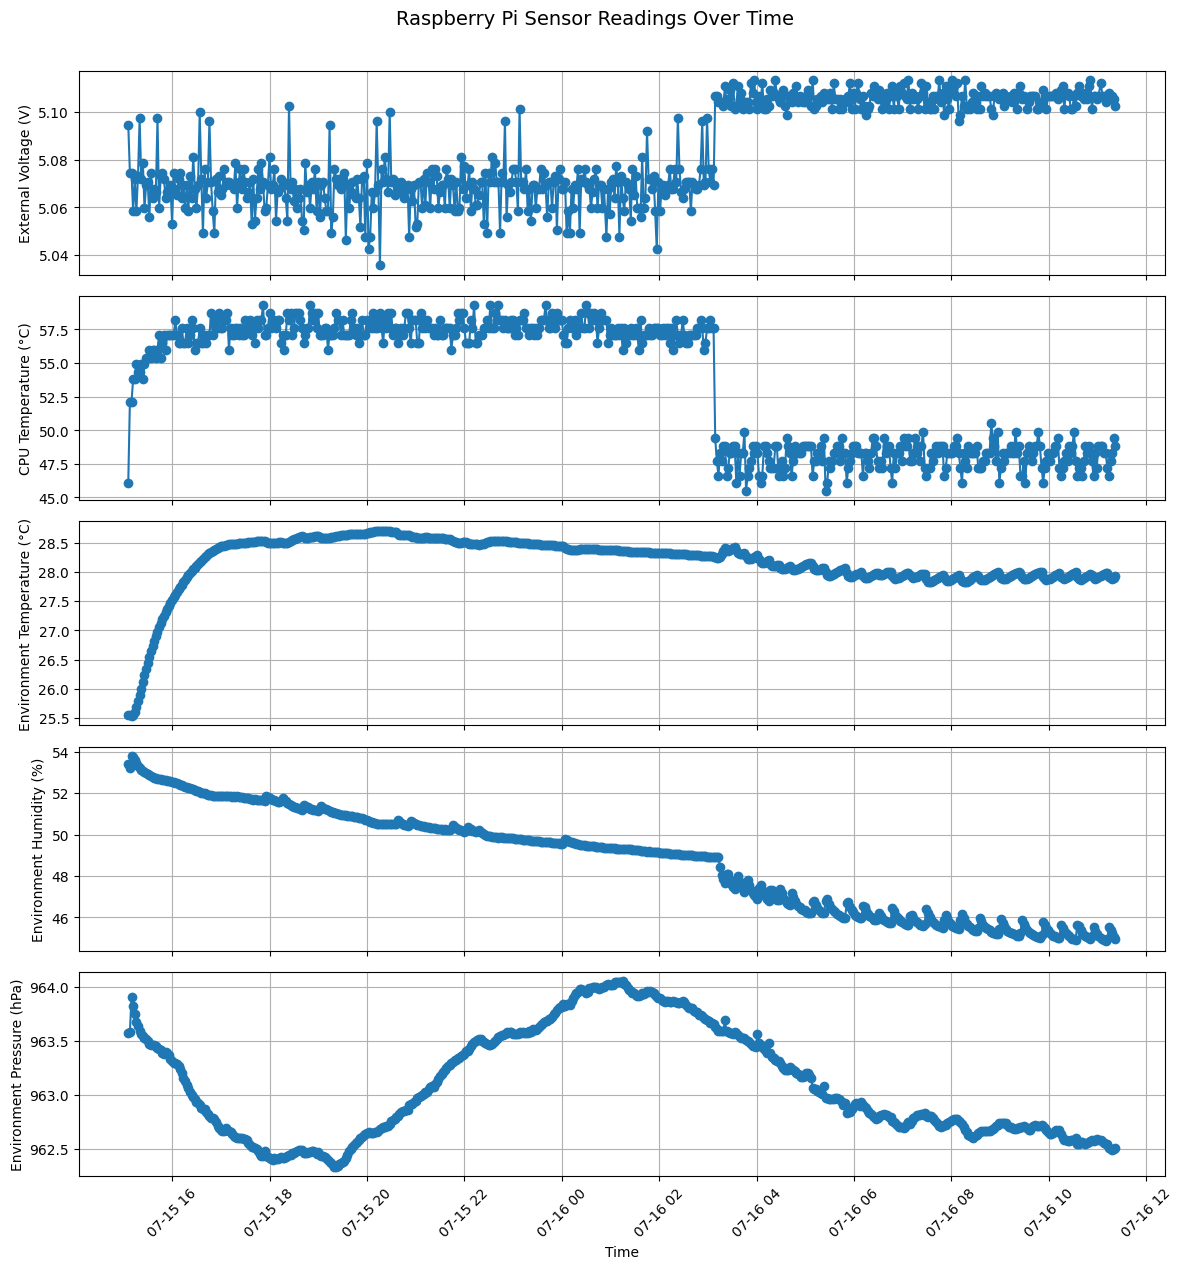

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Function to load and process the data
def load_monitorpi_csv(filepath):
    df = pd.read_csv(filepath)
    # Convert 'localtime' from string to datetime
    df["timestamp"] = pd.to_datetime(df["localtime"], format="%Y_%m_%d_%H_%M")
    return df

# Function to plot all relevant columns
def plot_monitorpi_data(df):
    time = df["timestamp"]
    columns_to_plot = [
        ("extvolt(V)", "External Voltage (V)"),
        ("cputemp(C)", "CPU Temperature (°C)"),
        ("envtemperature(C)", "Environment Temperature (°C)"),
        ("envhumidity(%)", "Environment Humidity (%)"),
        ("envpressure(hPa)", "Environment Pressure (hPa)")
    ]

    num_plots = len(columns_to_plot)
    fig, axs = plt.subplots(num_plots, 1, figsize=(12, 2.5 * num_plots), sharex=True)
    
    for ax, (col, label) in zip(axs, columns_to_plot):
        ax.plot(time, df[col], marker="o", linestyle="-")
        ax.set_ylabel(label)
        ax.grid(True)

    axs[-1].set_xlabel("Time")
    fig.suptitle("Raspberry Pi Sensor Readings Over Time", fontsize=14)
    fig.tight_layout(rect=[0, 0, 1, 0.97])
    plt.xticks(rotation=45)
    plt.show()

# Example usage
df_monitor = load_monitorpi_csv("acquisitions/20250715_longhaul/logs/monitorpi_2025_07_15_15_06.csv")
plot_monitorpi_data(df_monitor)

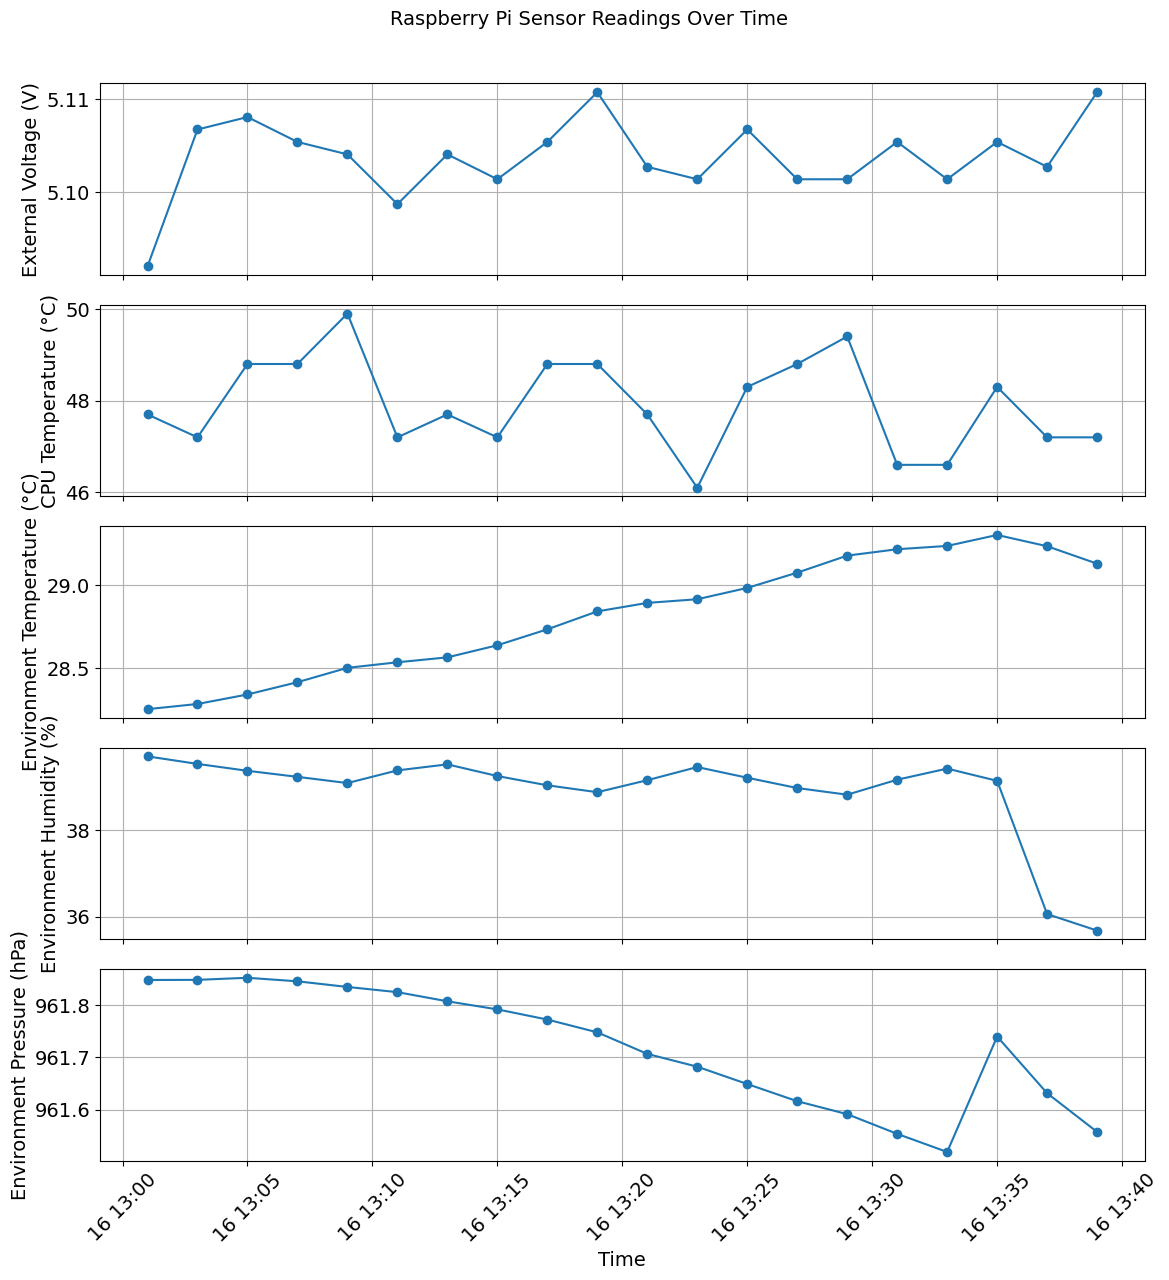

In [4]:
plot_monitorpi_fromcsv('acquisitions/20250716_longhaul/logs/monitorpi_2025_07_16_13_01.csv')


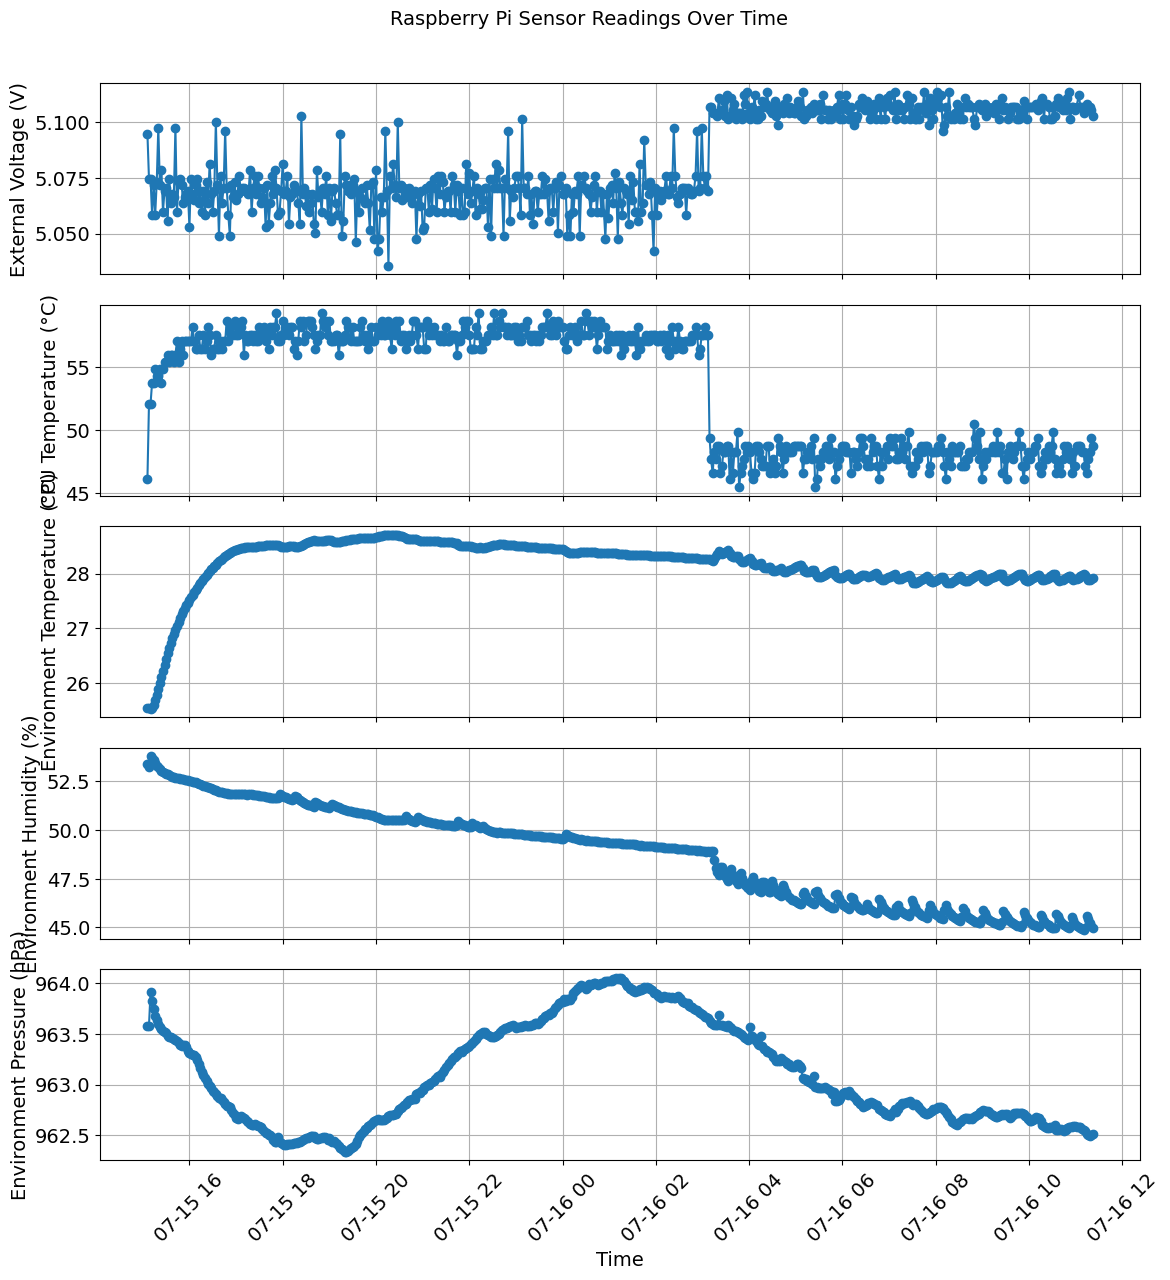

In [6]:
plot_monitorpi_fromcsv('acquisitions/20250715_longhaul/logs/monitorpi_2025_07_15_15_06.csv')